# Attitude Refine 

#### Motivation: 
refine attitude for elfin fgm calibration.
#### Overview: 
this code generates a cone of vectors around a given vector
#### Reference: 
[Rodrigues rotation](https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula): rotate vector `v` around axis `k` by `theta` 
#### Method:
- rotate original `v` by an angle around an axis to get the rotated `v`
- rotate the rotated `v` around original `v` from 0 to 2pi 

**Created on:** April 27, 2023

In [10]:
%matplotlib widget

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

define rodrigues rotation

In [12]:
def rodrigues_rotation(v, k, theta):
    return v * np.cos(theta) + np.cross(k, v) * np.sin(theta) + k * np.dot(k, v) * (1 - np.cos(theta))

example of attitude vector 

In [13]:
[x, y, z] = [-0.5662106 ,  0.73347607,  0.37268436]
v = np.array([x, y, z]) # Your original vector
v = v / np.linalg.norm(v) # Normalize the vector

define a rotation angle in degree

In [14]:
angle_delta = np.radians(10) 

rotate original `v` to get the rotated `v`

In [15]:
# Find an orthogonal vector to the original vector v
ortho = np.array([-v[1], v[0], 0])
if np.linalg.norm(ortho) < 1e-8: # exclude situation like v= [0, 0, 1]
    ortho = np.array([0, -v[2], v[1]])
ortho = ortho / np.linalg.norm(ortho)

rotated_vector = rodrigues_rotation(v, ortho, angle_delta)

rotate the rotated `v` around the original `v` to get a cone

In [16]:
rotated_points = [rodrigues_rotation(rotated_vector, v, np.deg2rad(ang)) for ang in range(0, 360, 10)]

visualization 

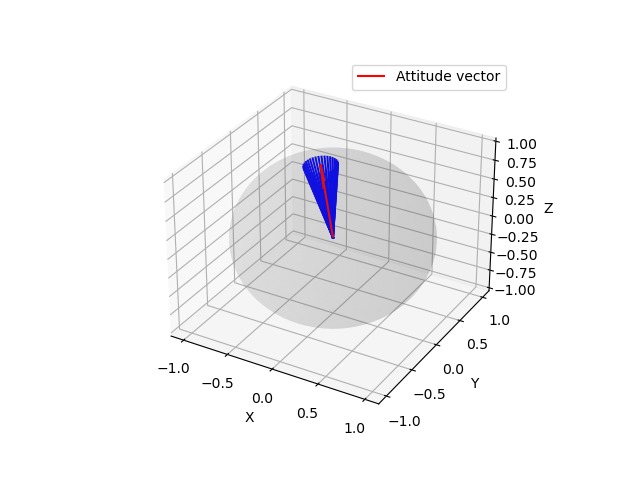

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the attitude vector to the plot
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red', label='Attitude vector', linewidth=1.5)

# Add the generated points on the circle to the plot
for points in rotated_points:
    ax.plot([0, points[0]], [0, points[1]], [0, points[2]], color='blue')

# Add a unit sphere to the plot
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
ax.legend()

# Show the plot
plt.show()